In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(pd.read_excel('DATA FILE 334 (2).xlsx')) 
df.head()

,Part ID,Planning Leadtime,Order Policy,Order Point,Safety Stock Qty,Fixed Order Qty,Days Of Supply,Minimum Order Qty,Maximum Order Qty,Multiple Order Qty,...,June (2019),July (2019),Aug (2019),Sep (2019),Oct (2019),Nov (2019),Dec (2019),Annual 1,Annual 2,ANNUAL DEMAND
0,1.548500e+05,14,P,NaN,0.0,NaN,30.0,50.0,NaN,NaN,...,7.0,7.0,6.0,6.0,6.0,6.0,6.0,74.0,74.0,74.0
1,3.684600e+06,35,D,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,10.0,4.0,10.0,11.0,11.0,11.0,11.0,118.0,118.0,118.0
2,3.270501e+09,56,P,NaN,NaN,NaN,30.0,25.0,NaN,25.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,57.0,57.0,57.0
3,3.270820e+09,35,P,NaN,NaN,NaN,60.0,NaN,NaN,NaN,...,5.0,4.0,5.0,6.0,5.0,5.0,5.0,57.0,58.0,58.0
4,3.275500e+09,49,P,NaN,NaN,NaN,28.0,12.0,NaN,1.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,52.0,52.0,52.0


In [5]:

df['Annual Cost Spent'] = df['Unit Material Cost'] * df['Annual Usage Qty']

# Filter by descending
df = df.sort_values(by='Annual Cost Spent', ascending=False)

# Calculate the number of parts in each category
num_parts_A = int(689 * 0.20)
num_parts_B = int(689* 0.30)
num_parts_C = int(689 - num_parts_A - num_parts_B)

# Calculate the number of part IDs in each category
count_A = df.head(num_parts_A)['Part ID'].nunique()
count_B = df[num_parts_A:num_parts_A + num_parts_B]['Part ID'].nunique()
count_C = df.tail(num_parts_C)['Part ID'].nunique()

print("Count of part IDs for A category (top 20%):", count_A)
print("Count of part IDs for B category (next 30%):", count_B)
print("Count of part IDs for C category (last 50%):", count_C)

# Add ABC categorization to the DataFrame as a new column
abc_categories = ['A'] * num_parts_A + ['B'] * num_parts_B + ['C'] * num_parts_C
df['ABC_Category'] = abc_categories

Count of part IDs for A category (top 20%): 137
Count of part IDs for B category (next 30%): 206
Count of part IDs for C category (last 50%): 346


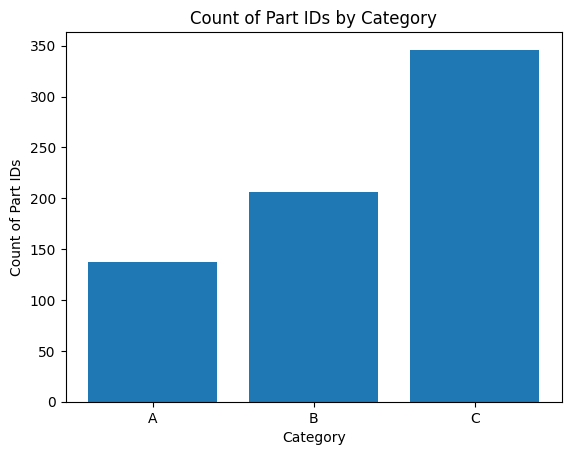

In [6]:
import matplotlib.pyplot as plt


categories = ['A', 'B', 'C']
counts = [count_A, count_B, count_C]

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count of Part IDs')
plt.title('Count of Part IDs by Category')
plt.show()


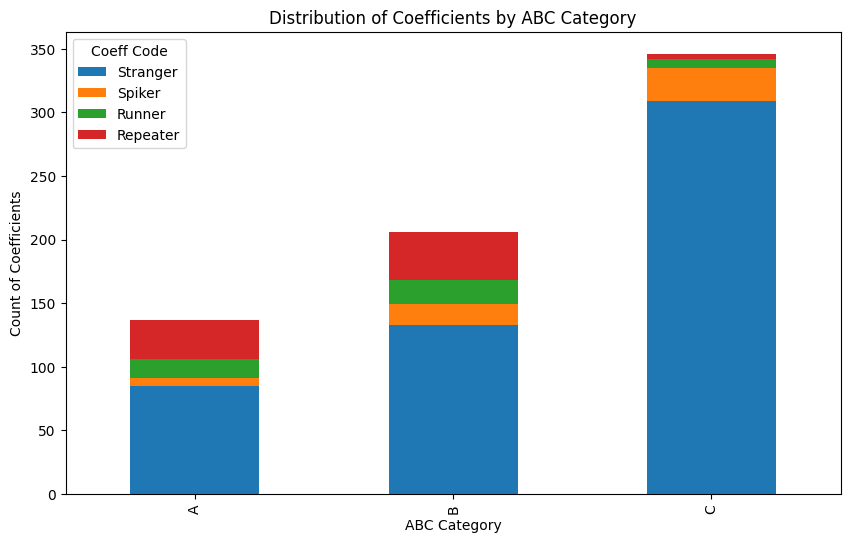

In [7]:
import matplotlib.pyplot as plt

# Calculate the count of each Coeff_Code in each ABC category
abc_coeff_counts = df.groupby(['ABC_Category', 'Coeff_Code']).size().unstack(fill_value=0)

# Reorder columns to match the order of Coeff_Code
abc_coeff_counts = abc_coeff_counts[['Stranger', 'Spiker', 'Runner', 'Repeater']]

# Plot the stacked bar graph
abc_coeff_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('ABC Category')
plt.ylabel('Count of Coefficients')
plt.title('Distribution of Coefficients by ABC Category')
plt.legend(title='Coeff Code')

plt.show()
